In [1]:
%pip install tensorflow==2.18.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.4/546.4 kB 8.5 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 📊 Exploratory Data Analysis: Corporate Credit Line Project
Using financial ratios to explore data before building a Keras deep learning model.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional for display
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')


In [179]:

# Load your CSV or Excel file
df = pd.read_csv("../data/corporate_rating.csv")  # update filename as needed
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.95,0.43,0.10,44.20,...,0.20,0.44,6.81,9.81,4.01,0.05,7.06,15.57,0.06,3.91
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.03,0.50,0.20,38.99,...,0.07,0.54,8.63,17.40,3.16,0.05,6.46,15.91,0.07,4.00
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.96,0.45,0.12,50.84,...,0.21,0.51,9.69,13.10,4.09,0.04,10.49,18.89,0.07,3.48
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.02,0.51,0.18,41.16,...,1.82,-0.15,-1.02,14.44,3.63,-0.01,4.08,6.90,0.03,4.58
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.96,0.50,0.14,47.76,...,0.17,0.45,7.14,14.26,4.01,0.05,8.29,15.81,0.06,3.86


In [180]:
# Check data types and nulls
df.info()

# Summary stats
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

,count,mean,std,min,25%,50%,75%,max
currentRatio,"2,029.00",3.53,44.05,-0.93,1.07,1.49,2.17,"1,725.51"
quickRatio,"2,029.00",2.65,32.94,-1.89,0.60,0.99,1.45,"1,139.54"
cashRatio,"2,029.00",0.67,3.58,-0.19,0.13,0.30,0.62,125.92
daysOfSalesOutstanding,"2,029.00",333.80,"4,447.84",-811.85,22.91,42.37,59.32,"115,961.64"
netProfitMargin,"2,029.00",0.28,6.06,-101.85,0.02,0.06,0.11,198.52
pretaxProfitMargin,"2,029.00",0.43,8.98,-124.34,0.03,0.08,0.14,309.69
grossProfitMargin,"2,029.00",0.50,0.53,-14.80,0.23,0.41,0.85,2.70
operatingProfitMargin,"2,029.00",0.59,11.22,-124.34,0.04,0.11,0.18,410.18
returnOnAssets,"2,029.00",-37.52,"1,166.17","-40,213.18",0.02,0.05,0.08,0.49
returnOnCapitalEmployed,"2,029.00",-73.97,"2,350.28","-87,162.16",0.03,0.07,0.14,2.44


In [181]:
# Show object (non-numeric) columns
df.select_dtypes(include='object').columns.tolist()

['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector']

In [182]:
# Drop identifiers 
cols_to_drop = ['Name', 'Symbol', 'Rating Agency Name']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])


# Convert 'Date' to datetime and extract year/month
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
df = df.drop(columns=['Date'])  # drop if not useful anymore

# Encode 'Rating' as ordinal
rating_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
df['Rating'] = df['Rating'].astype(pd.CategoricalDtype(categories=rating_order, ordered=True))
df['Rating'] = df['Rating'].cat.codes  # AAA=0, D=9, -1 for unknowns

# One hot encoding for sector
df = pd.get_dummies(df, columns=['Sector'], prefix='Sector')



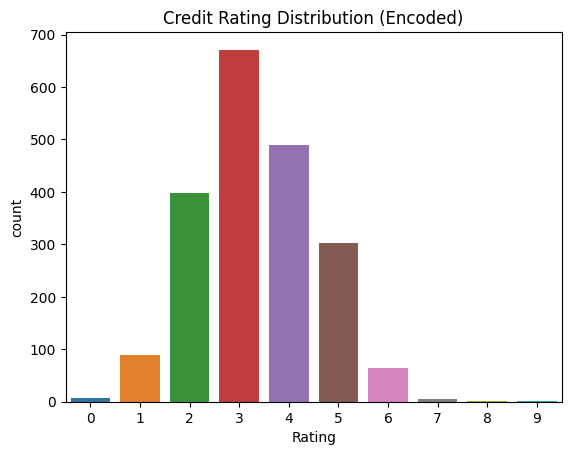

In [185]:
# Ratings distribution
sns.countplot(x='Rating', data=df)
plt.title("Credit Rating Distribution (Encoded)")
plt.show()


In [186]:
# Check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   int8   
 1   currentRatio                        2029 non-null   float64
 2   quickRatio                          2029 non-null   float64
 3   cashRatio                           2029 non-null   float64
 4   daysOfSalesOutstanding              2029 non-null   float64
 5   netProfitMargin                     2029 non-null   float64
 6   pretaxProfitMargin                  2029 non-null   float64
 7   grossProfitMargin                   2029 non-null   float64
 8   operatingProfitMargin               2029 non-null   float64
 9   returnOnAssets                      2029 non-null   float64
 10  returnOnCapitalEmployed             2029 non-null   float64
 11  returnOnEquity                      2029 no

In [187]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
Series([], dtype: int64)


## Distribution Plots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


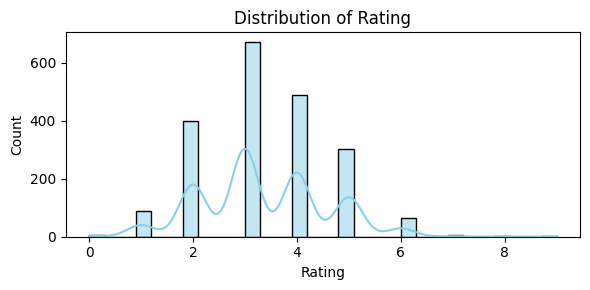

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Rating'] # df.select_dtypes(include='number').columns

for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


## Correlation Heatmap

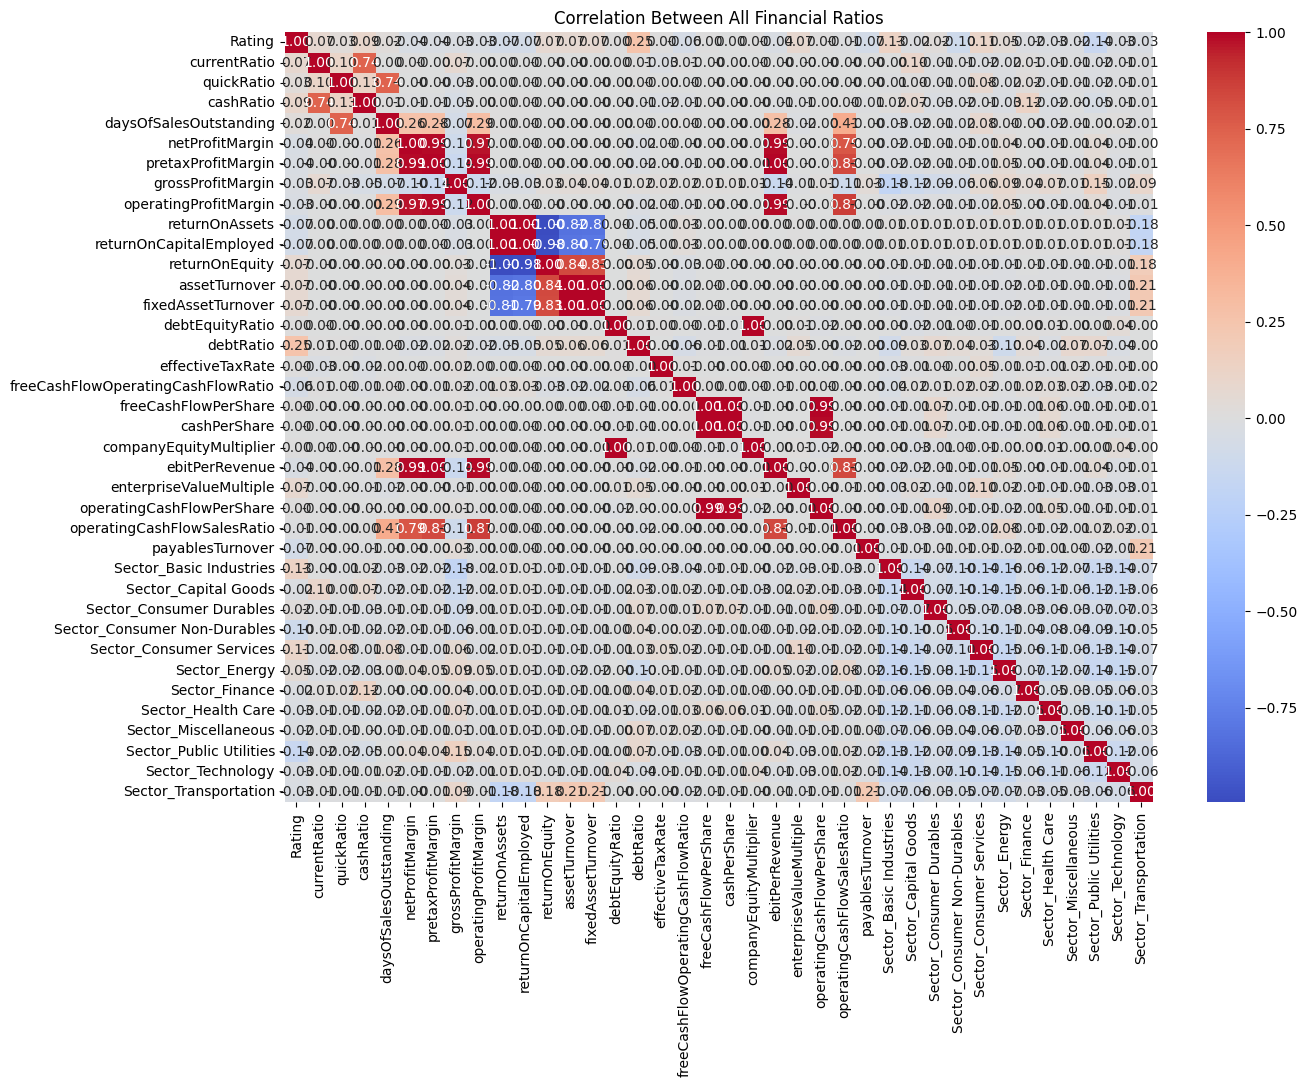

In [189]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between All Financial Ratios")
plt.show()

In [190]:
data_columns = df.columns

In [191]:
predictors = df[data_columns[data_columns != 'Rating']] # all columns except Rating
target = df['Rating'] # creditLine column

In [192]:
predictors.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.95,0.43,0.10,44.20,0.04,0.05,0.18,0.06,0.04,0.09,...,True,False,False,False,False,False,False,False,False,False
1,1.03,0.50,0.20,38.99,0.04,0.05,0.18,0.07,0.05,0.10,...,True,False,False,False,False,False,False,False,False,False
2,0.96,0.45,0.12,50.84,0.03,0.04,0.17,0.06,0.03,0.08,...,True,False,False,False,False,False,False,False,False,False
3,1.02,0.51,0.18,41.16,0.02,-0.01,0.14,0.04,0.03,-0.03,...,True,False,False,False,False,False,False,False,False,False
4,0.96,0.50,0.14,47.76,0.04,0.05,0.18,0.07,0.05,0.10,...,True,False,False,False,False,False,False,False,False,False


In [193]:
target.describe()

count   2,029.00
mean        3.36
std         1.22
min         0.00
25%         3.00
50%         3.00
75%         4.00
max         9.00
Name: Rating, dtype: float64

Normalize the data by substracting the mean and dividing by the standard deviation.

In [194]:
# predictors_norm = (predictors - predictors.mean()) / predictors.std()
# predictors_norm.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
predictors_norm = scaler.fit_transform(predictors)

In [195]:
n_cols = predictors_norm.shape[1] # number of predictors

## Import Keras Packages

In [196]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

## Build a Neural Network

In [197]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and Test the Network

In [198]:
# build the model
model = regression_model()

* train and test the model at the same time using the fit method.  
* leave out 30% of the data for validation and train the model for 100 epochs.

In [199]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
45/45 - 0s - 10ms/step - loss: 6.4879 - val_loss: 4.4151
Epoch 2/100
45/45 - 0s - 1ms/step - loss: 2.4774 - val_loss: 2.7760
Epoch 3/100
45/45 - 0s - 1ms/step - loss: 1.5238 - val_loss: 2.3443
Epoch 4/100
45/45 - 0s - 1ms/step - loss: 1.2893 - val_loss: 1.9713
Epoch 5/100
45/45 - 0s - 1ms/step - loss: 1.2158 - val_loss: 1.8428
Epoch 6/100
45/45 - 0s - 1ms/step - loss: 1.1892 - val_loss: 1.8621
Epoch 7/100
45/45 - 0s - 1ms/step - loss: 1.1626 - val_loss: 1.8354
Epoch 8/100
45/45 - 0s - 1ms/step - loss: 1.1439 - val_loss: 1.8810
Epoch 9/100
45/45 - 0s - 1ms/step - loss: 1.1207 - val_loss: 1.8665
Epoch 10/100
45/45 - 0s - 1ms/step - loss: 1.1121 - val_loss: 1.8637
Epoch 11/100
45/45 - 0s - 1ms/step - loss: 1.1145 - val_loss: 1.8185
Epoch 12/100
45/45 - 0s - 1ms/step - loss: 1.1167 - val_loss: 1.8515
Epoch 13/100
45/45 - 0s - 1ms/step - loss: 1.0945 - val_loss: 1.8441
Epoch 14/100
45/45 - 0s - 1ms/step - loss: 1.1157 - val_loss: 2.0402
Epoch 15/100
45/45 - 0s - 1ms/step - loss:

In [200]:

def regression_model():
    input_colm = predictors_norm.shape[1] # Number of input features
    # create model
    model = Sequential()
    model.add(Input(shape=(input_colm,)))  # Set the number of input features 
    model.add(Dense(50, activation='relu'))  
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu')) 
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))  
    model.add(Dense(1))  # Output layer
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [201]:
# Write your code here
# build the model
model = regression_model()
model.fit(predictors_norm, target, validation_split=0.1, epochs=100, verbose=2)

Epoch 1/100
58/58 - 1s - 10ms/step - loss: 5.1852 - val_loss: 4.1503
Epoch 2/100
58/58 - 0s - 1ms/step - loss: 1.8365 - val_loss: 2.0505
Epoch 3/100
58/58 - 0s - 958us/step - loss: 1.5139 - val_loss: 1.5579
Epoch 4/100
58/58 - 0s - 958us/step - loss: 1.3294 - val_loss: 1.6186
Epoch 5/100
58/58 - 0s - 931us/step - loss: 1.2552 - val_loss: 1.5693
Epoch 6/100
58/58 - 0s - 961us/step - loss: 1.2057 - val_loss: 1.4697
Epoch 7/100
58/58 - 0s - 940us/step - loss: 1.2064 - val_loss: 1.5678
Epoch 8/100
58/58 - 0s - 924us/step - loss: 1.1777 - val_loss: 1.7579
Epoch 9/100
58/58 - 0s - 930us/step - loss: 1.1507 - val_loss: 1.3913
Epoch 10/100
58/58 - 0s - 939us/step - loss: 1.1302 - val_loss: 1.5571
Epoch 11/100
58/58 - 0s - 951us/step - loss: 1.1282 - val_loss: 1.5036
Epoch 12/100
58/58 - 0s - 933us/step - loss: 1.1081 - val_loss: 1.4708
Epoch 13/100
58/58 - 0s - 941us/step - loss: 1.3028 - val_loss: 1.3776
Epoch 14/100
58/58 - 0s - 935us/step - loss: 1.1082 - val_loss: 1.6613
Epoch 15/100
58/58

# Apply SHAP to Interpret Feature Weights

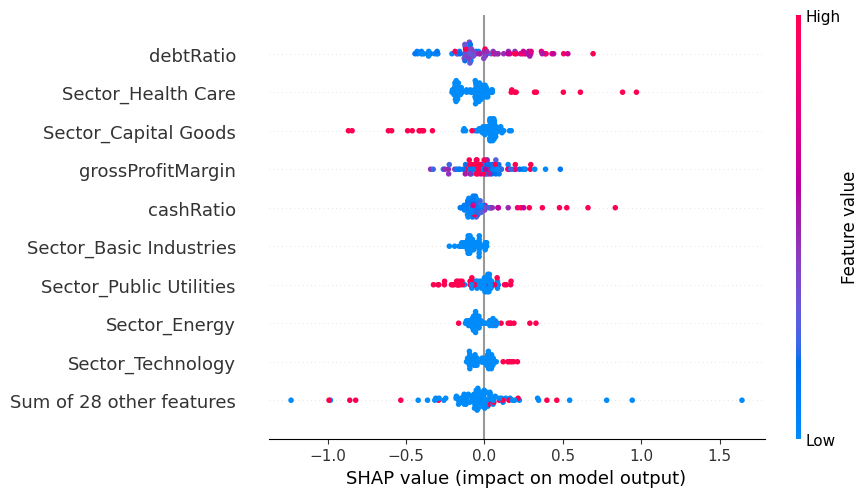

In [202]:
import shap

# Use the DeepExplainer for Keras
explainer = shap.Explainer(model, predictors_norm, feature_names=predictors.columns)
shap_values = explainer(predictors_norm[:100])  # limit to 100 samples for speed

# Summary plot
shap.plots.beeswarm(shap_values)
